In [2]:
import os, glob, pickle
import pandas as pd
import re
import time
import itpScraper
from bs4 import BeautifulSoup
import numpy as np
import datetime

In [3]:
def extract_filename_time(x):
    pattern = 'UserSessionDicts_Temp_(\d\d-\d\d-\d\d)_(.*?).pickle'
    return pd.to_datetime("_".join(re.findall(pattern, x)[0]), format="%m-%d-%y_%H%M%p")

In [4]:
fresh_scrape = True

In [5]:
prior_scrape_folders = [f for f in glob.glob("Scrape*") if re.match("Scrape(\d+)", f)]
prior_scrape_folders = sorted(prior_scrape_folders, key=lambda f: int(re.findall("Scrape(\d+)", f)[0]))
most_recent_scrape = prior_scrape_folders[-1]
print("Most recent scrape: {}".format(most_recent_scrape))

if fresh_scrape:
    last_user_scraped = None #Fresh Start
    print("Creating Fresh Scrape")
    new_dir_n = int(re.findall("Scrape(\d+)", most_recent_scrape)[0]) + 1
    new_dir = "Scrape{}".format(new_dir_n)
    print("Creating Directory For New Scrape: {}".format(new_dir))
    os.mkdir(new_dir)
    os.chdir(new_dir)
else:
    os.chdir(most_recent_scrape)
    #Navigate to Last Scrape
    temp_dicts = glob.glob("UserSessionDicts_Temp*")
    # pattern = 'UserSessionDicts_Temp_(\d\d-\d\d-\d\d)_(.*?).pickle'
    temp_dicts = sorted(temp_dicts, key=extract_filename_time)
    print("Last 5 files scraped:\n", temp_dicts[-5:])
    
    filename = temp_dicts[-1]
    with open(filename, 'rb') as f:
        user_dicts_prev = pickle.load(f)
    print("Total Users Scraped Thus Far: {}".format(len(user_dicts_prev)))
    last_user_scraped = list(user_dicts_prev.keys())[-1]
    print("Last User Scraped: {}".format(last_user_scraped))

Most recent scrape: Scrape1
Creating Fresh Scrape
Creating Directory For New Scrape: Scrape2


In [6]:
scraper = itpScraper.itpScraper()

In [7]:
scraper.login()
time.sleep(2.5)

user_dict = scraper.parse_all_user_rsvps(last_user_scraped=last_user_scraped)

Hit error: Message: Unable to locate element: //div[@id='tabAttending']

Creating temporary save of user_dicts.
Hit error: Message: Unable to locate element: //div[@id='tabAttending']

Creating temporary save of user_dicts.
Hit error: Message: Unable to locate element: //div[@id='tabAttending']

Creating temporary save of user_dicts.
Hit error: Message: Unable to locate element: //div[@id='tabAttending']

Creating temporary save of user_dicts.
Hit error: Message: Unable to locate element: //div[@id='tabAttending']

Creating temporary save of user_dicts.
Hit error: Message: Unable to locate element: //div[@id='tabAttending']

Creating temporary save of user_dicts.
Hit error: Message: Unable to locate element: //div[@id='tabAttending']

Creating temporary save of user_dicts.
Hit error: Message: Unable to locate element: //div[@id='tabAttending']

Creating temporary save of user_dicts.
Hit error: Message: Unable to locate element: //div[@id='tabAttending']

Creating temporary save of user

## Alternative Tab Form:
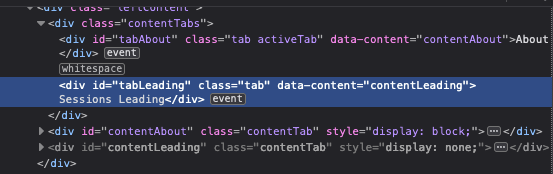

In [8]:
len(user_dict)

218

In [9]:
glob.glob("UserSessionDicts_Complete*")

['UserSessionDicts_Complete_06-16-23_1619PM.pickle']

In [10]:
all_ids = sorted(list(set([s['id'] for sessions in user_dict.values() for s in sessions])))
print(len(all_ids))
all_ids[:5]

264


[1, 8, 9, 10, 11]

In [57]:
sessions_master_dict = {}
user_arrays = {}
user_corpuses = {}
errors = []
users_w_errors = []
for ud in [user_dict]:
    user_names = list(ud.keys())
    for user in user_names:
        user_corpus = []
        try:
            user_sessions = ud[user]
            #Create User Array
            u_s_ids = sorted([s['id'] for s in user_sessions])
            user_array = np.isin(all_ids, u_s_ids).astype(int)
            user_arrays[user] = user_array
            for s in user_sessions:
                #Add Tags to User Corpus
                [user_corpus.append(t) for t in s['tags']]
                #If Session Not Previously Seen Cache in Master Session Dict
                if s['id'] not in sessions_master_dict.keys():
                    sessions_master_dict[s['id']] = s
            user_corpuses[user] = user_corpus
        except Exception as e:
            print("Hit Error: ", e)
            errors.append(e)
            users_w_errors.append(user)
print(len(sessions_master_dict.keys()))
#Create DF From Sparse User Arrays
df = pd.DataFrame.from_dict(user_arrays, orient='index')
df.columns = all_ids
print(df.shape)
df.head()

264
(218, 264)


,1,8,9,10,11,12,13,14,15,16,...,314,315,316,317,319,320,321,322,323,324
Abby Schmiedt,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Ada Varriale (she/her),0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Adeline Setiawan,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Aki,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alan Wong,0,1,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
Counter(list(user_corpuses.items())[3][1])

Counter({'#ai': 2,
         '#vr': 1,
         '#dall-e 2': 1,
         '#3d': 1,
         '#hdri': 1,
         '#equirectangular': 1,
         '#shop': 1,
         '#safety training': 1,
         '#mandatory': 1,
         '#wireless': 1,
         '#ESP': 1,
         '#Machines Learning': 1,
         '#P5.JS': 1,
         '#ML5.JS': 1,
         '#Creative Coding': 1,
         '#vacuform': 1,
         '#post-consumer waste': 1,
         '#upcycle': 1,
         '#paper': 1,
         '#papermaking': 1,
         '#sculpture': 1,
         '#diy': 1,
         '#hands-on': 1,
         '#crafts': 1,
         '#quantum': 1,
         '#demo': 1,
         '#science': 1,
         '#lasers': 1,
         '#cool': 1,
         '#webml': 1,
         '#tensorflow': 1,
         '#machine learning': 1,
         '#psychology': 1,
         '#mindfulness': 1,
         '#AI': 2,
         '#global': 1,
         '#pop culture': 1,
         '#art': 2,
         '#tech': 1,
         '#music': 1,
         '#film': 

In [13]:
time_now = datetime.datetime.now().strftime("%m-%d-%y_%H%M%p")
filename = "UserSessionAttendanceArrays_as_of_{}.csv".format(time_now)
print("Saving to: {}".format(filename))
df.to_csv(filename)

Saving to: UserSessionAttendanceArrays_as_of_06-16-23_1637PM.csv


In [14]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(df, df)
dist.shape

(218, 218)

In [21]:
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn import metrics
from sklearn.cluster import KMeans

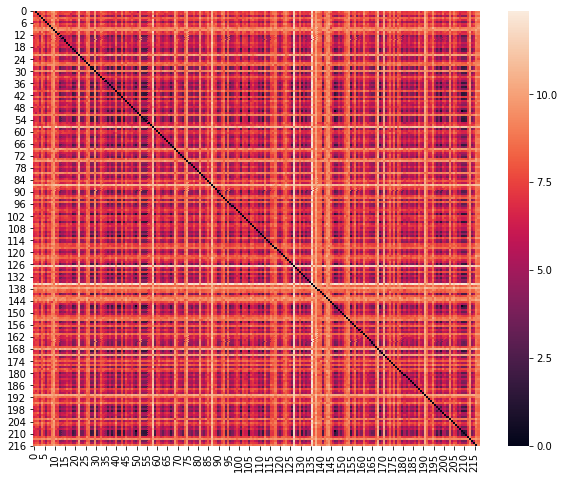

In [22]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(dist)

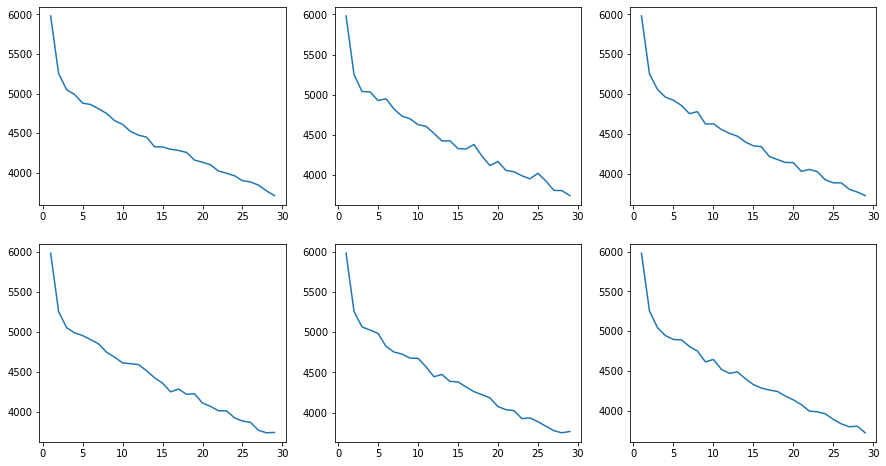

In [23]:
#This has a random seed - you can rerun with slightly different results

ncols = 2
fig, axs = plt.subplots(ncols,3, figsize=(15,8))

for n in range(6):
    cluster_inertias = []
    cluster_sizes = []


    ax = axs[n%ncols][n//ncols]
    for i in range(1,30):
        kmeans = KMeans(
            n_clusters=i,
            max_iter=100,
            n_init=1,
        ).fit(df)

        cluster_inertias.append(kmeans.inertia_)
        cluster_sizes.append(i)
    ax.plot(cluster_sizes, cluster_inertias)

In [24]:
from collections import Counter

In [25]:
kmeans = KMeans(n_clusters=15,
                max_iter=100,
                n_init=1,
                )
clusters = kmeans.fit_predict(df)
print(clusters.shape)
print(Counter(clusters))

(218,)
Counter({3: 91, 13: 34, 7: 24, 0: 16, 14: 15, 1: 12, 4: 8, 12: 5, 8: 3, 9: 2, 5: 2, 6: 2, 10: 2, 2: 1, 11: 1})


In [26]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## PCA Viz

Explained variance:  [0.17287093 0.03697363 0.03155497]


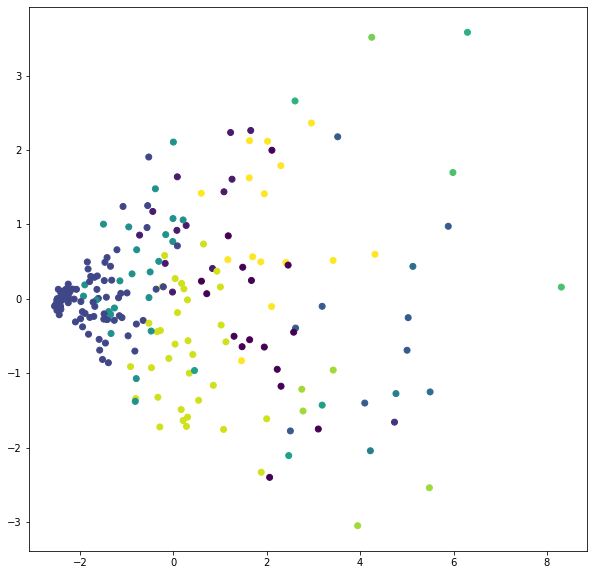

In [27]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)

print("Explained variance: ",pca.explained_variance_ratio_)
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(pca_result[:,0], pca_result[:,1], c=clusters)

In [28]:
from mpl_toolkits.mplot3d import Axes3D

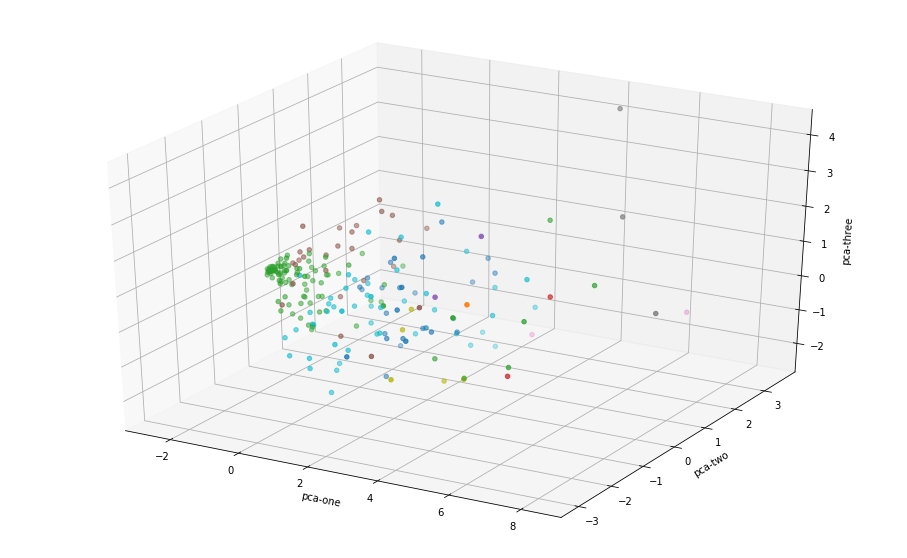

In [29]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=clusters, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### TSNE

In [30]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 218 samples in 0.000s...
[t-SNE] Computed neighbors for 218 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 218 / 218
[t-SNE] Mean sigma: 1.664517
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.938370
[t-SNE] KL divergence after 300 iterations: 1.093613
t-SNE done! Time elapsed: 0.5297970771789551 seconds


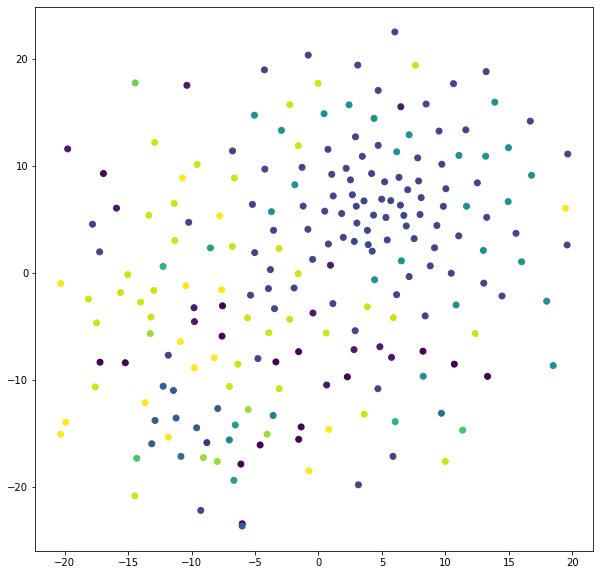

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clusters)

In [33]:
time_now

'06-16-23_1637PM'

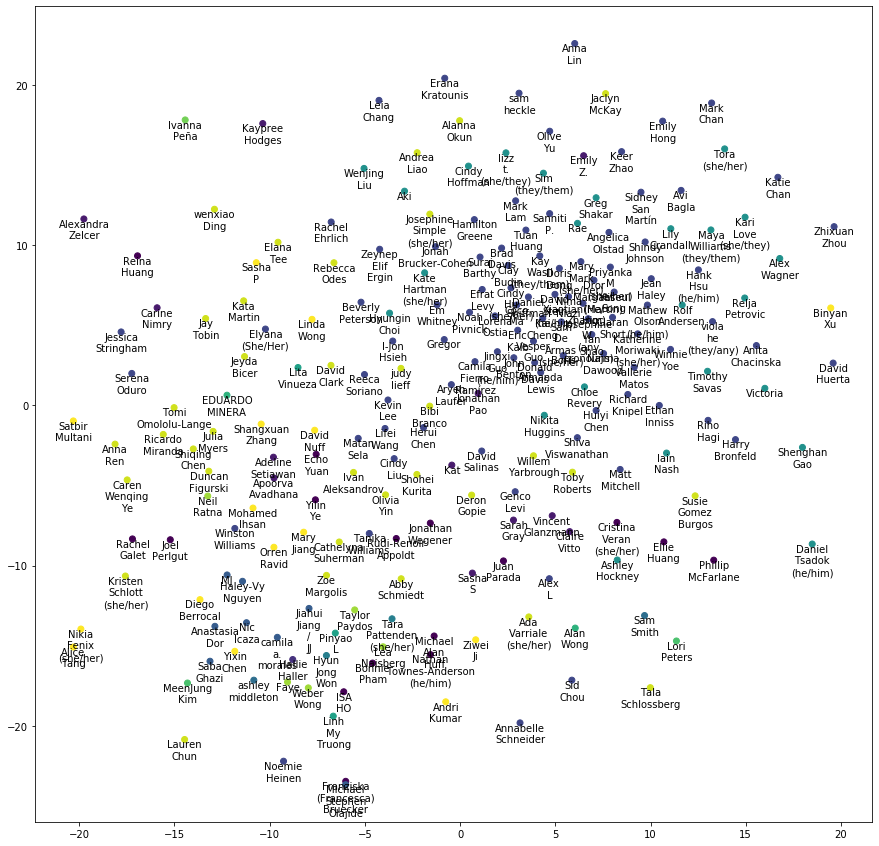

In [34]:
fig, ax = plt.subplots(figsize=(15,15))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clusters)

# add labels to all points
for (xi, yi, name) in zip(tsne_results[:,0], tsne_results[:,1], df.index):
    plt.text(xi, yi, "\n".join(name.split()), va='top', ha='center')

filename = "ITP_TSNE_Campers_Clustering_{}.png".format(time_now)    
plt.savefig(filename)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 218 samples in 0.001s...
[t-SNE] Computed neighbors for 218 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 218 / 218
[t-SNE] Mean sigma: 1.664517
[t-SNE] KL divergence after 250 iterations with early exaggeration: 156.230316
[t-SNE] KL divergence after 300 iterations: 4.099910


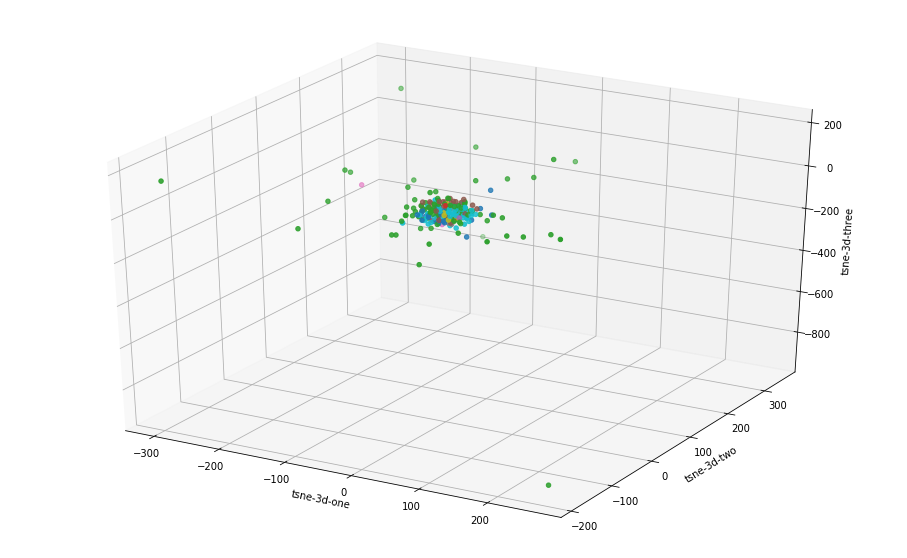

In [35]:
time_start = time.time()
tsne3d = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results_3d = tsne3d.fit_transform(df)

df['tsne-3d-one'] = tsne_results_3d[:,0]
df['tsne-3d-two'] = tsne_results_3d[:,1] 
df['tsne-3d-three'] = tsne_results_3d[:,2]

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df['tsne-3d-one'], 
    ys=df['tsne-3d-two'], 
    zs=df['tsne-3d-three'], 
    c=clusters, 
    cmap='tab10'
)
ax.set_xlabel('tsne-3d-one')
ax.set_ylabel('tsne-3d-two')
ax.set_zlabel('tsne-3d-three')

filename = "ITP_TSNE_Campers_Clustering_3D_{}.png".format(time_now)    
plt.savefig(filename)
plt.show()

## User's 5 Closest Euclidean Pairs:

In [94]:
df.reset_index().head()

,index,1,8,9,10,11,12,13,14,15,...,288,290,291,293,pca-one,pca-two,pca-three,tsne-3d-one,tsne-3d-two,tsne-3d-three
0,Abby Schmiedt,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1.164394,-1.631332,-0.472374,-16.924307,37.095898,-0.441268
1,Ada Varriale (she/her),0,0,1,0,1,0,0,1,0,...,0,0,0,0,0.114797,0.508827,-0.341567,-35.378662,1.147689,15.965610
2,Adeline Setiawan,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.051105,0.779783,-1.957770,-12.521429,-2.318404,-14.256520
3,Aki,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.249912,0.427728,0.538733,12.888682,25.711899,-24.192410
4,Alan Wong,0,0,0,1,1,0,0,1,0,...,0,0,0,0,-0.512527,-0.122902,-1.706515,-22.745930,-6.483883,-4.374103


In [39]:
ex_user = "Matt Mitchell"
temp = df.reset_index().rename(columns={'index':'Name'})
row_number = temp[temp.Name==ex_user].index
print(row_number)

Int64Index([134], dtype='int64')


In [40]:
closest_usr_indices = np.argsort(dist[row_number])[0,:10]
closest_usr_indices
closest_users = temp.loc[closest_usr_indices]['Name']
closest_users

134                           Matt Mitchell
42                                  Coco Ma
155       Priyanka M\n            (she/her)
112      Kay Wasil\n            (they/them)
59                               Efrat Levy
44                          Daniel Shiffman
67                                Eric Kalb
209                  Xiaotian(Martin) Zhang
83                              I-Jon Hsieh
55     Dror Margalit\n            (He/ Him)
Name: Name, dtype: object

In [41]:
from sklearn.metrics import jaccard_score

In [42]:
cols = [col for col in df.columns if type(col)==int]
for user in closest_users:
    score = jaccard_score(df.loc[ex_user][cols], df.loc[user][cols])
    print("{} Jaccard Similarity: {}".format(user, score))

Matt Mitchell Jaccard Similarity: 1.0
Coco Ma Jaccard Similarity: 0.05263157894736842
Priyanka M
            (she/her) Jaccard Similarity: 0.05
Kay Wasil
            (they/them) Jaccard Similarity: 0.05
Efrat Levy Jaccard Similarity: 0.09523809523809523
Daniel Shiffman Jaccard Similarity: 0.05
Eric Kalb Jaccard Similarity: 0.05
Xiaotian(Martin) Zhang Jaccard Similarity: 0.0
I-Jon Hsieh Jaccard Similarity: 0.2
Dror Margalit
            (He/ Him) Jaccard Similarity: 0.0


In [43]:
usr1_s_ids = [col for col in df.columns if df.loc[ex_user][col] == 1]
usr2_s_ids = [col for col in df.columns if df.loc[user][col] == 1]
print(usr1_s_ids)
print(usr2_s_ids)

[10, 12, 34, 49, 50, 64, 72, 79, 81, 89, 104, 114, 130, 190, 224, 252, 256, 257, 311]
[177]


In [44]:
similarities = []
for user in df.index:
    score = jaccard_score(df.loc[ex_user][cols], df.loc[user][cols])
    similarities.append((user, score))
similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
similarities[:10]

[('Matt Mitchell', 1.0),
 ('Kata Martin', 0.24324324324324326),
 ('Winston Williams', 0.22857142857142856),
 ('I-Jon Hsieh', 0.2),
 ('Shohei Kurita', 0.19047619047619047),
 ('Nathan Townes-Anderson (he/him)', 0.1875),
 ('Sasha S', 0.18421052631578946),
 ('David Nuff', 0.18),
 ('Ricardo Miranda', 0.17777777777777778),
 ('Nikia Fenix (she/her)', 0.1746031746031746)]

In [142]:
ex_user = np.random.choice(df.index, 1)[0]
print("Example User: ", ex_user)

similarities = []
for user in df.index:
    score = jaccard_score(df.loc[ex_user][cols], df.loc[user][cols])
    similarities.append((user, score))
similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
similarities[:10]

Example User:  Lori Peters


[('Lori Peters', 1.0),
 ('MeenJung kim', 0.49444444444444446),
 ('Saba Ghazi', 0.45),
 ('Carine Nimry', 0.40625),
 ('EDUARDO MINERA', 0.4025157232704403),
 ('Michael Stephen Olajide', 0.375),
 ('Nic Icaza', 0.35443037974683544),
 ('ashley middleton', 0.35403726708074534),
 ('Neil Ratna', 0.3466666666666667),
 ('Anastasia Dor', 0.34459459459459457)]

In [144]:
user = similarities[1][0]

usr1_s_ids = [col for col in df.columns if df.loc[ex_user][col] == 1]
usr2_s_ids = [col for col in df.columns if df.loc[user][col] == 1]
print("{} {} sessions:\n{}".format(ex_user, len(usr1_s_ids), usr1_s_ids))
print("{} {} sessions:\n{}".format(user, len(usr2_s_ids), usr2_s_ids))

Lori Peters 120 sessions:
[1, 8, 9, 12, 13, 19, 20, 21, 22, 24, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 47, 48, 49, 50, 55, 56, 57, 58, 60, 61, 65, 67, 68, 70, 71, 72, 74, 75, 81, 82, 83, 84, 85, 86, 88, 89, 92, 94, 95, 97, 99, 100, 105, 106, 107, 109, 112, 116, 125, 126, 128, 129, 130, 137, 138, 139, 140, 141, 143, 145, 146, 147, 150, 151, 152, 153, 155, 157, 158, 159, 160, 165, 166, 169, 173, 174, 175, 176, 178, 179, 203, 227, 233, 243, 246, 247, 248, 249, 250, 253, 256, 257, 259, 261, 262, 263, 264, 265, 266, 270, 271, 272, 275, 276, 281]
MeenJung kim 149 sessions:
[1, 8, 14, 16, 17, 18, 19, 21, 22, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 113, 114, 115, 126, 127, 128, 129, 130, 133, 134, 135, 136, 137, 138, 139, 140

Sessions Per Persion Stats
Mean: 34.33 Median: 27.0


Text(0.5, 0, 'Number of Sessions Someone Signed Up For')

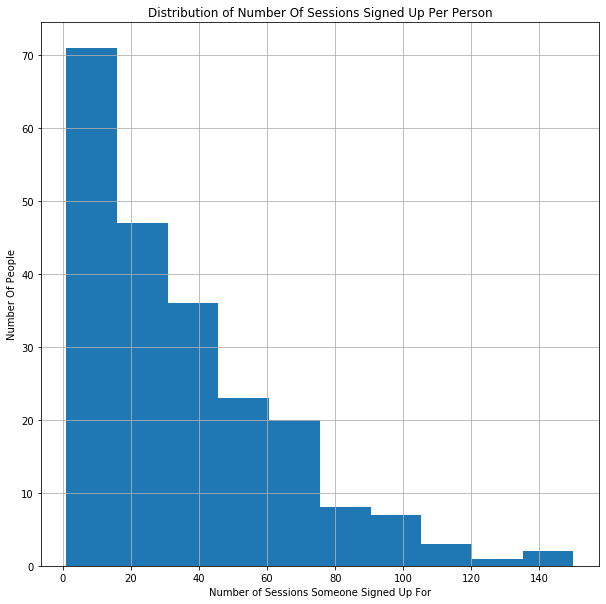

In [45]:
signups_pp = df[cols].sum(axis=1)
print("Sessions Per Persion Stats\nMean: {} Median: {}".format(round(np.mean(signups_pp),2),
                                                              round(np.median(signups_pp),2)
                                                              )
     )
signups_pp.hist(figsize=(10,10))
plt.title("Distribution of Number Of Sessions Signed Up Per Person")
plt.ylabel("Number Of People")
plt.xlabel("Number of Sessions Someone Signed Up For")

## Clustering With Keyword Tags

In [52]:
len(sessions_master_dict)

264

In [56]:
session_id = np.random.choice(list(sessions_master_dict.keys()))
print(session_id)
session_details = sessions_master_dict[session_id]
print(session_details['title'],"\n",session_details['tags'])

1
Reactive Programming with RxJS 
 ['#web', '#javascript', '#code', '#asynchronous']
